# 6 Support Vector Machine
## 6.1 Kernels
Support Vector Machine can [use different kernels](https://en.wikipedia.org/wiki/Kernel_method): linear, radial basis function, polynomial, sigmoid, etc. The difference between some of them can be seen after running the code below that uses a classical example. Besides the usual packages, the *sklearn* package is also used here.

Accuracy: 82.00%


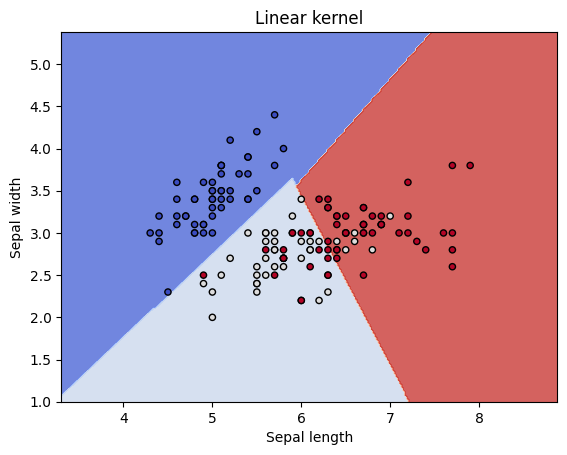

Accuracy: 82.67%


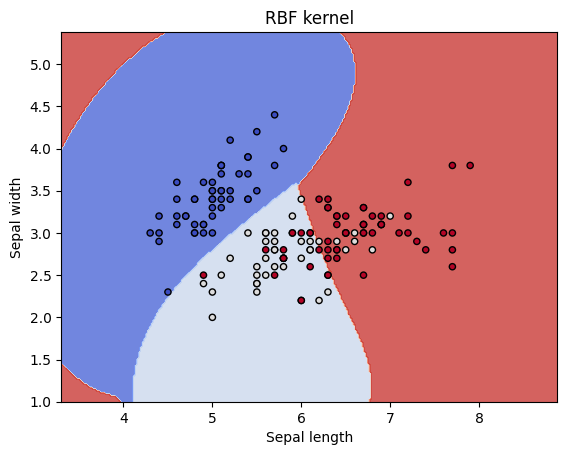

Accuracy: 81.33%


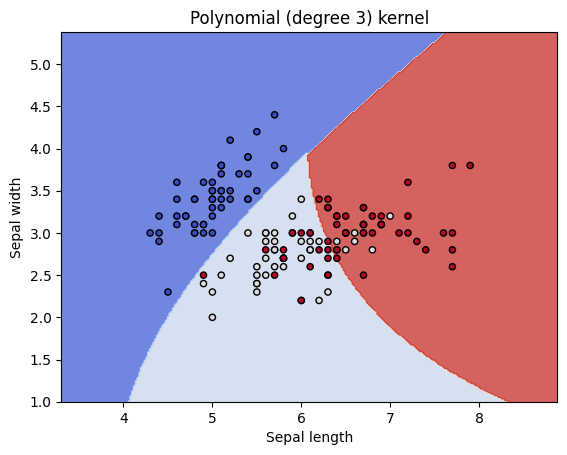

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#take the well-known iris dataset
iris = datasets.load_iris()
#we will use only sepal length and width
x=iris.data[:, :2]
y=iris.target

#plot points
x1, x2=x[:, 0], x[:, 1]
x_min, x_max=x1.min()-1, x1.max()+1
y_min, y_max=x2.min()-1, x2.max()+1
h=0.02
plot_x, plot_y=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#regularization
C=1.0  
models=(svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="rbf", gamma=0.7, C=C),
          svm.SVC(kernel="poly", degree=3, C=C))
models=(model.fit(x, y) for model in models)

# title for the plots
titles = ("Linear kernel", "RBF kernel", "Polynomial (degree 3) kernel")


for model, title in zip(models, titles):
    points=model.predict(np.c_[plot_x.ravel(), plot_y.ravel()]).reshape(plot_x.shape)
    plt.contourf(plot_x, plot_y, points, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.xlim(plot_x.min(), plot_x.max())
    plt.ylim(plot_y.min(), plot_y.max())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    
    predicted=model.predict(x);
    print("Accuracy: %.2lf%%"%(100*np.sum(y==predicted)/y.size))
    
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    
    plt.show()

**Tasks**

1. What accuracies are achieved when other features are used as well?
2. Split the dataset into a training and testing part, fit the SVM model on the training part, and test it on the testing part. What gives the highest accuracy?
3. Make the code below give over 90% accuracy and then explain how you achieved it and why did it work.

In [1]:
import numpy as np
from sklearn import svm, datasets

n1=400
n2=400

class1=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=2, high=8, size=n2)])+np.tile(np.array([[3/2, 0]]), (n1, 1))
class2=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=-1, high=4, size=n2)])
x=np.vstack((class1, class2))
y=np.concatenate((np.ones((n1)), 2*np.ones((n2))))

idx=np.random.permutation(y.size)
x=x[idx, :]
y=y[idx]

s=round((n1+n2)/2)
#s=600

x_train=x[:s, :]
y_train=y[:s]

x_test=x[s:, :]
y_test=y[s:]

#EDIT ONLY FROM HERE...
model=svm.SVC(kernel="linear")
model.fit(x_train, y_train)
#...TO HERE

predicted=model.predict(x_test);
print("Accuracy linear: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))

#EDIT ONLY FROM HERE...
model=svm.SVC(kernel="rbf")
model.fit(x_train, y_train)
#...TO HERE

predicted=model.predict(x_test);
print("Accuracy rbf: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))

#EDIT ONLY FROM HERE...
model=svm.SVC(kernel="poly", degree=3)
model.fit(x_train, y_train)
#...TO HERE

predicted=model.predict(x_test);
print("Accuracy poly 3: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))


Accuracy linear: 61.75%
Accuracy rbf: 90.50%
Accuracy poly 3: 73.75%


## 6.2 Wine dataset
Here we are going to make some experiments with the wine dataset to see how features can [affect](https://en.wikipedia.org/wiki/Feature_selection) the classification.

**Tasks**

1. Which SVM kernel will achieve the highest accuracy when all features are used?
2. If you can use **only one** feature and any kernel to achieve highest possible accuracy, which feature and kernel would that be?
3. If you can use **only two** features and any kernel to achieve highest possible accuracy, which feature and kernel would that be?
4. How do you explain the results?

In [3]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target
idx=np.random.permutation(y.size)
x=x[idx, :]
y=y[idx]

#all features
#print(x.shape[1])
features_idx=range(x.shape[1])
#only some of the features
#features_idx=[0, 1]

x=x[:, features_idx]

s=round(y.size/2)

x_train=x[:s, :]
y_train=y[:s]

x_test=x[s:, :]
y_test=y[s:]

C=1
C=1.0  
models=(svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="rbf", gamma=0.7, C=C),
          svm.SVC(kernel="poly", degree=3, C=C))
models=(model.fit(x, y) for model in models)

# title for the plots
titles = ("Linear kernel", "RBF kernel", "Polynomial (degree 3) kernel")

#
model=svm.SVC(kernel="linear", C=C)
model.fit(x_train, y_train)

predicted=model.predict(x_test);
print("Accuracy linear, all features: %.2lf%% +++BEST KERNEL+++"%(100*np.sum(y_test==predicted)/y_test.size))

model=svm.SVC(kernel="rbf", C=C)
model.fit(x_train, y_train)

predicted=model.predict(x_test);
print("Accuracy rbf, all features: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))

model=svm.SVC(kernel="poly", degree=3, C=C)
model.fit(x_train, y_train)

predicted=model.predict(x_test);
print("Accuracy poly=3, all features: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))

print()
print("TEST FOR ONE FEATURE")
print()

cur_best_acc = 0
cur_best_idx = 0
cur_best_kernel = ""

l = x.shape[1]

for model, title in zip(models, titles):
    for i in range(l):    
        x=wine.data
        y=wine.target
        idx=np.random.permutation(y.size)
        x=x[idx, :]
        y=y[idx]
        features_idx=[i]
        x=x[:, features_idx]
        s=round(y.size/2)
        x_train=x[:s, :]
        y_train=y[:s]
        x_test=x[s:, :]
        y_test=y[s:]

        model.fit(x_train, y_train)

        predicted=model.predict(x_test);
        perc = 100*np.sum(y_test==predicted)/y_test.size;
        if perc > cur_best_acc:
            cur_best_acc = perc
            cur_best_idx = i
            cur_best_kernel = title
            print("New best acc:", cur_best_acc, "% for feature:", cur_best_idx, "with", cur_best_kernel)
        
print()
print("Best acc:", cur_best_acc, " % for feature:", cur_best_idx, "with", cur_best_kernel)
print()

print()
print("TEST FOR TWO FEATURES")
print()

cur_best_acc = 0
cur_best_idx = (0,0)
cur_best_kernel = ""

models=(svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="rbf", gamma=0.7, C=C),
          svm.SVC(kernel="poly", degree=3, C=C))
models=(model.fit(x, y) for model in models)

for model, title in zip(models, titles):
    print(title)
    for i in range(l):
        for j in range(13):
            if j<=i:
                continue
            # print(i, j)
            x=wine.data
            y=wine.target
            idx=np.random.permutation(y.size)
            x=x[idx, :]
            y=y[idx]
            features_idx=[i,j]
            x=x[:, features_idx]
            s=round(y.size/2)
            x_train=x[:s, :]
            y_train=y[:s]
            x_test=x[s:, :]
            y_test=y[s:]

            model.fit(x_train, y_train)

            predicted=model.predict(x_test);
            perc = 100*np.sum(y_test==predicted)/y_test.size;
            if perc > cur_best_acc:
                cur_best_acc = perc
                cur_best_idx = (i,j)
                cur_best_kernel = title
                print("New best acc:", cur_best_acc, "% for features:", (i,j), "with", cur_best_kernel)

print()
print("Best acc:", cur_best_acc, " % for features:", cur_best_idx, "with", cur_best_kernel)

Accuracy linear, all features: 93.26% +++BEST KERNEL+++
Accuracy rbf, all features: 74.16%
Accuracy poly=3, all features: 73.03%

TEST FOR ONE FEATURE

New best acc: 69.66292134831461 % for feature: 0 with Linear kernel
New best acc: 83.14606741573034 % for feature: 6 with Linear kernel

Best acc: 83.14606741573034  % for feature: 6 with Linear kernel


TEST FOR TWO FEATURES

Linear kernel
New best acc: 77.52808988764045 % for features: (0, 1) with Linear kernel
New best acc: 82.02247191011236 % for features: (0, 5) with Linear kernel
New best acc: 89.88764044943821 % for features: (0, 6) with Linear kernel
New best acc: 91.01123595505618 % for features: (6, 9) with Linear kernel
RBF kernel
New best acc: 93.25842696629213 % for features: (0, 6) with RBF kernel
Polynomial (degree 3) kernel

Best acc: 93.25842696629213  % for features: (0, 6) with RBF kernel


## 6.3 Speed
SVM is really great, but it has an important disadvantage with respect to neural networks in general. Here we are going to demonstrate it.

**Tasks**
1. Run the code below for various dataset sizes and each time store the time needed for the model to fit.
2. Draw a plot that shows the influence of dataset size on execution time.
3. How would you model the influence?
4. How would you model the same influence in case of multilayer perceptron?

3 ANSWER: we could model influence with exponential function

4 ANSWER: no, for MLP we would model infulence with linear function

[0.004014492034912109, 0.0010447502136230469, 0.001020193099975586, 0.002007007598876953, 0.0005152225494384766, 0.004518747329711914, 0.0, 0.006889820098876953, 0.008647918701171875, 0.029207706451416016, 0.04069352149963379, 0.060262203216552734, 0.09979057312011719, 0.12983155250549316, 0.15023493766784668, 0.20046424865722656, 0.412914514541626, 0.5426936149597168, 0.4533698558807373, 0.4611473083496094, 0.6088309288024902, 0.7889993190765381, 0.8612120151519775, 1.0880553722381592, 1.9300808906555176, 4.819035291671753, 8.191198825836182, 12.564911842346191, 19.988940477371216, 37.42645239830017]


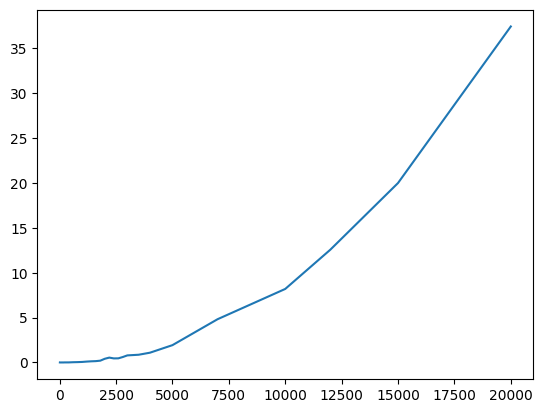

In [195]:
import numpy as np
from sklearn import svm, datasets
import time;
import matplotlib.pyplot as plt

def create_data(n1, n2):
    class1=np.c_[np.random.normal(0, 1, size=n1), np.random.normal(0, 1, size=n1)]
    class2=np.c_[np.random.normal(2, 1, size=n2), np.random.normal(0, 1, size=n2)]
    x=np.vstack((class1, class2))
    y=np.concatenate((np.ones((n1)), 2*np.ones((n2))))
    
    return x, y

model=svm.SVC(kernel="rbf", C=1.0)
log = []

Ns = [10, 20, 30, 50, 80, 100, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3500, 4000, 5000, 7000, 10000, 12000, 15000, 20000]

for n in Ns:
    x, y=create_data(n, n)
    start=time.time()
    model.fit(x, y)
    end=time.time();
    t=end-start
    log.append(t);
    
print(log)

plt.plot(Ns, log)